In [2]:
#Source Code : #from https://www.kaggle.com/code/andrej0marinchenko/titanic-data-science-solutions-upd/notebook

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [170]:
#Importing data for training and testing

x_train = pd.read_csv('/kaggle/input/titanic/train.csv')
x_test = pd.read_csv('/kaggle/input/titanic/test.csv')
y_train = np.array(x_train['Survived'].copy())
#avoid preprocess data separately
all_data = [x_train,x_test]

In [171]:
x_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:



print('-Number of dimensions of training dataset',x_train.ndim)

print('-Training dataset dimensions ',x_train.shape)

print('-Training dataset columns names',x_train.columns.values)

print(' Training dataset infos',x_train.info(verbose=True))

print('----------------------------------------')

print('-Number of dimensions of test dataset',x_test.ndim)

print('-Test dataset dimensions ',x_test.shape)

print('-Training dataset columns names',x_test.columns.values)

print(' Training dataset infos',x_test.info(verbose=True))

-Number of dimensions of training dataset 2
-Training dataset dimensions  (891, 12)
-Training dataset columns names ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 Training dataset inf

In [11]:
#show duplicated rows
x_train[x_train.duplicated()]
##No duplicated rows in training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [74]:
#show duplicated rows
x_test[x_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
#descriptive statistics for numerical columns

x_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
x_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:ylabel='Survived'>

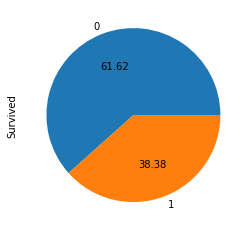

In [20]:

x_train['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

#Most of passengers died

<AxesSubplot:ylabel='Pclass'>

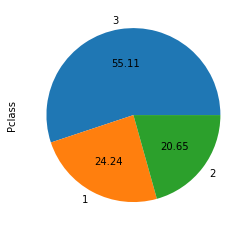

In [21]:
x_train['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')
#More than half of the passengers were in 3rd class

<AxesSubplot:ylabel='Sex'>

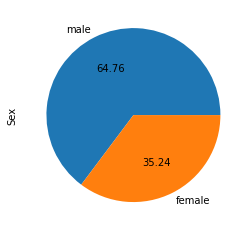

In [23]:
x_train['Sex'].value_counts().plot(kind='pie', autopct='%.2f') 
#Almost two thirds of the passengers are female

<AxesSubplot:>

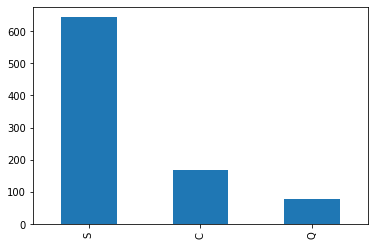

In [24]:
x_train.Embarked.value_counts().plot.bar()


In [43]:
df1 =  x_train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean()
df1
#Most of women survived, while most of men died  ===> target variable may be correlated with Sex feature

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [44]:
x_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

#Most of 1st class passerngers survived, while most of 3rd class died  => target variable may be correlated with Pclass feature

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [46]:
x_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#Passengers with less then 3  SibSp survived more then other passengers

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
x_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [50]:
x_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


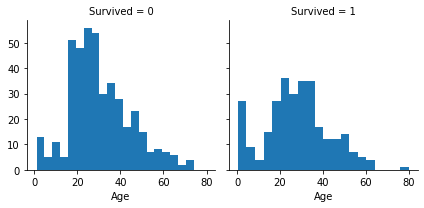

In [57]:


g = sns.FacetGrid(x_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#Oldest passengers (80 years old) survived
#Infants had highest survival rate
#Passengers between 15-25 years old had a low of rate survive

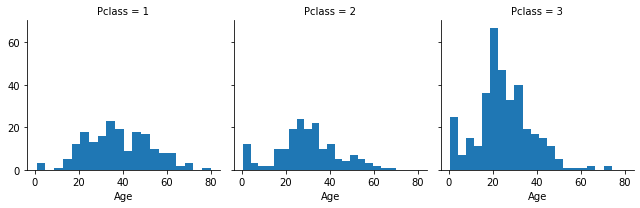

In [65]:

g = sns.FacetGrid(x_train, col='Pclass')
g.map(plt.hist, 'Age', bins=20)
#Pclass varies in terms of Age distribution of passengers

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


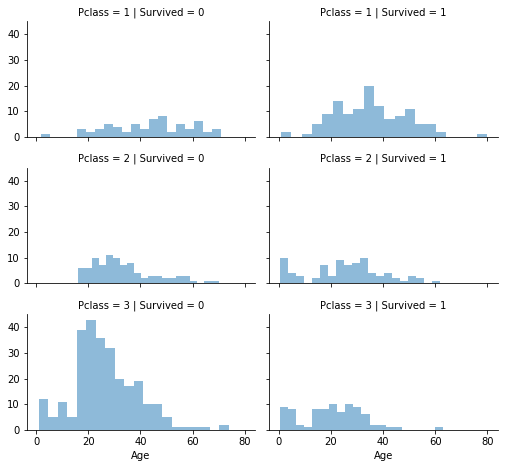

In [62]:
grid = sns.FacetGrid(x_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#1st class passengers had highest survive rate
#most  of 3rd class passengers did not survive
#oldest passengers in 1st class survived 
#Infant passengers in Pclass=2 and Pclass=3 mostly survived

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


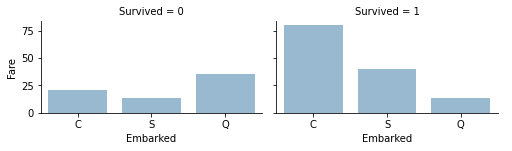

In [73]:
grid = sns.FacetGrid(x_train, col='Survived',size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Embarked','Fare', alpha=.5, ci=None)
grid.add_legend()

#Higher fare paying passengers had better survival in C and S embarkation 



In [172]:
#Ticket feature has high ratio (22%) of duplicate values (unique=681) ===> Drop
#Cabin feature has a lot of missing values ===> Drop

x_train = x_train.drop(['Ticket', 'Cabin'], axis=1)
x_test = x_test.drop(['Ticket', 'Cabin'], axis=1)
all_data = [x_train,x_test]

In [173]:
#Extract Title (Mrs,Miss,Master,...) from passenger name

for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(x_train['Title'], x_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [174]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
x_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


#Miss , Master and Mrs had the highest rate of survive

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [175]:
#Convert the categorical titles to numerical.

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

x_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [176]:
x_train = x_train.drop(['Name', 'PassengerId'], axis=1)
x_test = x_test.drop(['Name'], axis=1)
all_data = [x_train,x_test]

In [177]:
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [178]:
# to fill missing values of age feature, will not fill them with mean value of all samples 
# but mean value  across sets of Pclass and Gender feature combinations 'correlated features'

guess_ages = np.zeros((2,3))
guess_ages

for dataset in all_data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

    

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [179]:
# create Age bands
x_train['AgeBand'] = pd.cut(x_train['Age'], 5)
x_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [180]:
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [181]:
x_train  = x_train.drop(['AgeBand'], axis=1)
all_data = [x_train , x_test]
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [182]:
#create a new feature for FamilySize which combines Parch and SibSp
for dataset in all_data:
    dataset['FamiSize'] = dataset['SibSp'] + dataset['Parch'] + 1

x_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamiSize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1
5,0,3,0,1,0,0,8.4583,Q,1,1
6,0,1,0,3,0,0,51.8625,S,1,1
7,0,3,0,0,3,1,21.0750,S,4,5
8,1,3,1,1,0,2,11.1333,S,3,3
9,1,2,1,0,1,0,30.0708,C,3,2


In [183]:
x_train [['FamiSize', 'Survived']].groupby(['FamiSize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamiSize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [184]:

x_train['IsAlone'] = 0
x_train.loc[x_train['FamiSize'] == 1, 'IsAlone'] = 1
  
x_test['IsAlone'] = 0
x_test.loc[x_test['FamiSize'] == 1, 'IsAlone'] = 1
x_train [['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [185]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamiSize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [186]:
x_train  = x_train.drop(['Parch', 'SibSp', 'FamiSize'], axis=1)
x_test  = x_test.drop(['Parch', 'SibSp', 'FamiSize'], axis=1)
all_data = [x_train,x_test]

x_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [187]:
for dataset in all_data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

x_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [159]:
freq_port = x_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [188]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
x_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [189]:
for dataset in all_data :
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

x_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [190]:
x_test['Fare'].fillna(x_test['Fare'].dropna().median(), inplace=True)
x_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [191]:
x_train['FareBand'] = pd.qcut(x_train['Fare'], 4)
x_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [192]:
for dataset in all_data :
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

x_train = x_train.drop(['FareBand'], axis=1)

    
x_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [193]:
x_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


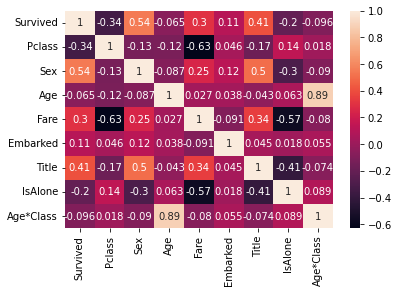

In [194]:
corrMatrix = x_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [195]:
x_train = x_train.drop("Survived", axis=1)

In [206]:
x_train = x_train.drop("Age", axis=1)

In [196]:
x_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [ ]:
x_test  = x_test.drop("PassengerId", axis=1).copy()

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}
]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=10)
grid_search.fit(x_train , y_train )
best_search_rf = grid_search.best_estimator_
print(best_search_rf)
grid_search.best_params_

LogisticRegression(C=0.1)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

{'C': 0.1, 'penalty': 'l2'}

In [209]:
logreg = LogisticRegression(C=0.1,penalty="l2")
logreg.fit(x_train, y_train )
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train , y_train) * 100, 2)
acc_log

80.47

In [ ]:
predictss = pd.DataFrame(Y_pred)
predictss.rename( columns={0 :'Survived'}, inplace=True )
x_tests = pd.read_csv('/kaggle/input/titanic/test.csv')

ffff = pd.concat([x_tests['PassengerId'],predictss],axis=1)
final = ffff[['PassengerId','Survived']]

In [ ]:
from IPython.display import HTML

final.to_csv('submission.csv', index=False)

def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')

In [210]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train , y_train )
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train , y_train )
acc_random_forest = round(random_forest.score(x_train , y_train ) * 100, 2)
acc_random_forest

86.76

In [211]:
predictss = pd.DataFrame(Y_pred)
predictss.rename( columns={0 :'Survived'}, inplace=True )
x_tests = pd.read_csv('/kaggle/input/titanic/test.csv')

ffff = pd.concat([x_tests['PassengerId'],predictss],axis=1)
final = ffff[['PassengerId','Survived']]

from IPython.display import HTML

final.to_csv('submission.csv', index=False)

def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')